In [1]:
import pandas as pd # type: ignore
import numpy as np # type: ignore
import seaborn as sns # type: ignore
import matplotlib.pyplot as plt # type: ignore
heart = pd.read_csv("/Users/taijieshengwu/Documents/科研/2024:8暑研/heart.csv")

print(heart.head)

# age: age in years
# sex: sex
# 1 = male
# 0 = female
# cp: chest pain type
# Value 0: typical angina
# Value 1: atypical angina
# Value 2: non-anginal pain
# Value 3: asymptomatic
# trestbps: resting blood pressure (in mm Hg on admission to the hospital)
# chol: serum cholestoral in mg/dl
# fbs: (fasting blood sugar > 120 mg/dl)
# 1 = true;
# 0 = false
# restecg: resting electrocardiographic results
# Value 0: normal
# Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
# Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
# thalach: maximum heart rate achieved
# exang: exercise induced angina
# 1 = yes
# 0 = no
# oldpeak = ST depression induced by exercise relative to rest
# slope: the slope of the peak exercise ST segment
# Value 0: upsloping
# Value 1: flat
# Value 2: downsloping
# ca: number of major vessels (0-3) colored by flourosopy
# thal:
# 0 = error (in the original dataset 0 maps to NaN's)
# 1 = fixed defect
# 2 = normal
# 3 = reversable defect
# target (the lable):
# 0 = no disease,
# 1 = disease


<bound method NDFrame.head of      age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  outp

In [2]:
heart.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


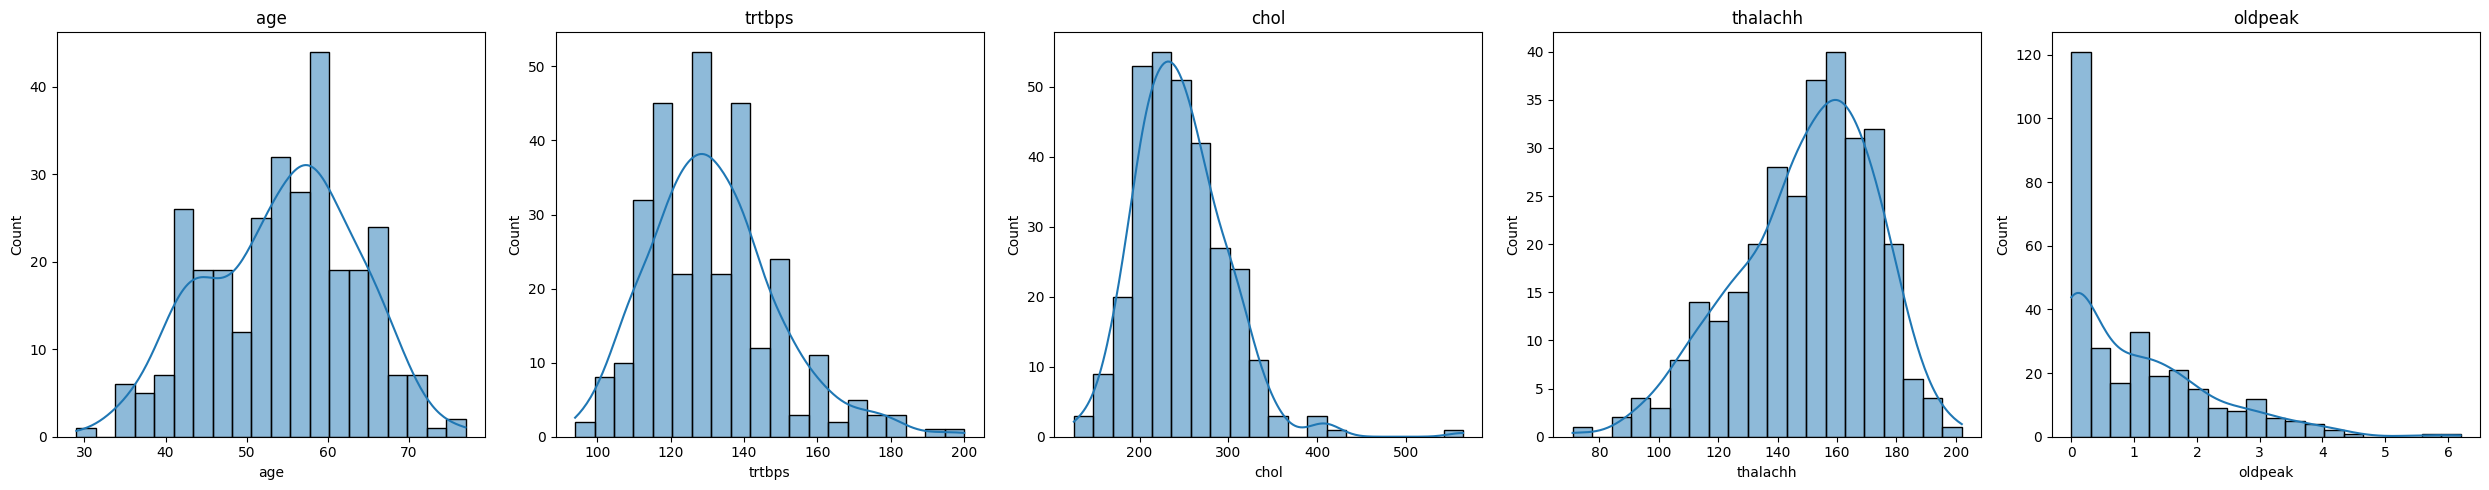

In [3]:
# continuous variables-age,trbgps,chol,thalachh,oldpeak
heart = pd.DataFrame(heart)

heart_con = heart[["age","trtbps","chol","thalachh","oldpeak"]]
# 创建图形
fig, axes = plt.subplots(1, len(heart_con.columns), figsize=(25, 5))

# 绘制条形图和密度图
for ax, column in zip(axes, heart_con.columns):
    # 条形图
    sns.histplot(heart_con[column], bins=20, ax=ax, kde=True)  # kde=True添加密度图
    ax.set_title(column)

# 显示图形
plt.tight_layout()
plt.show()

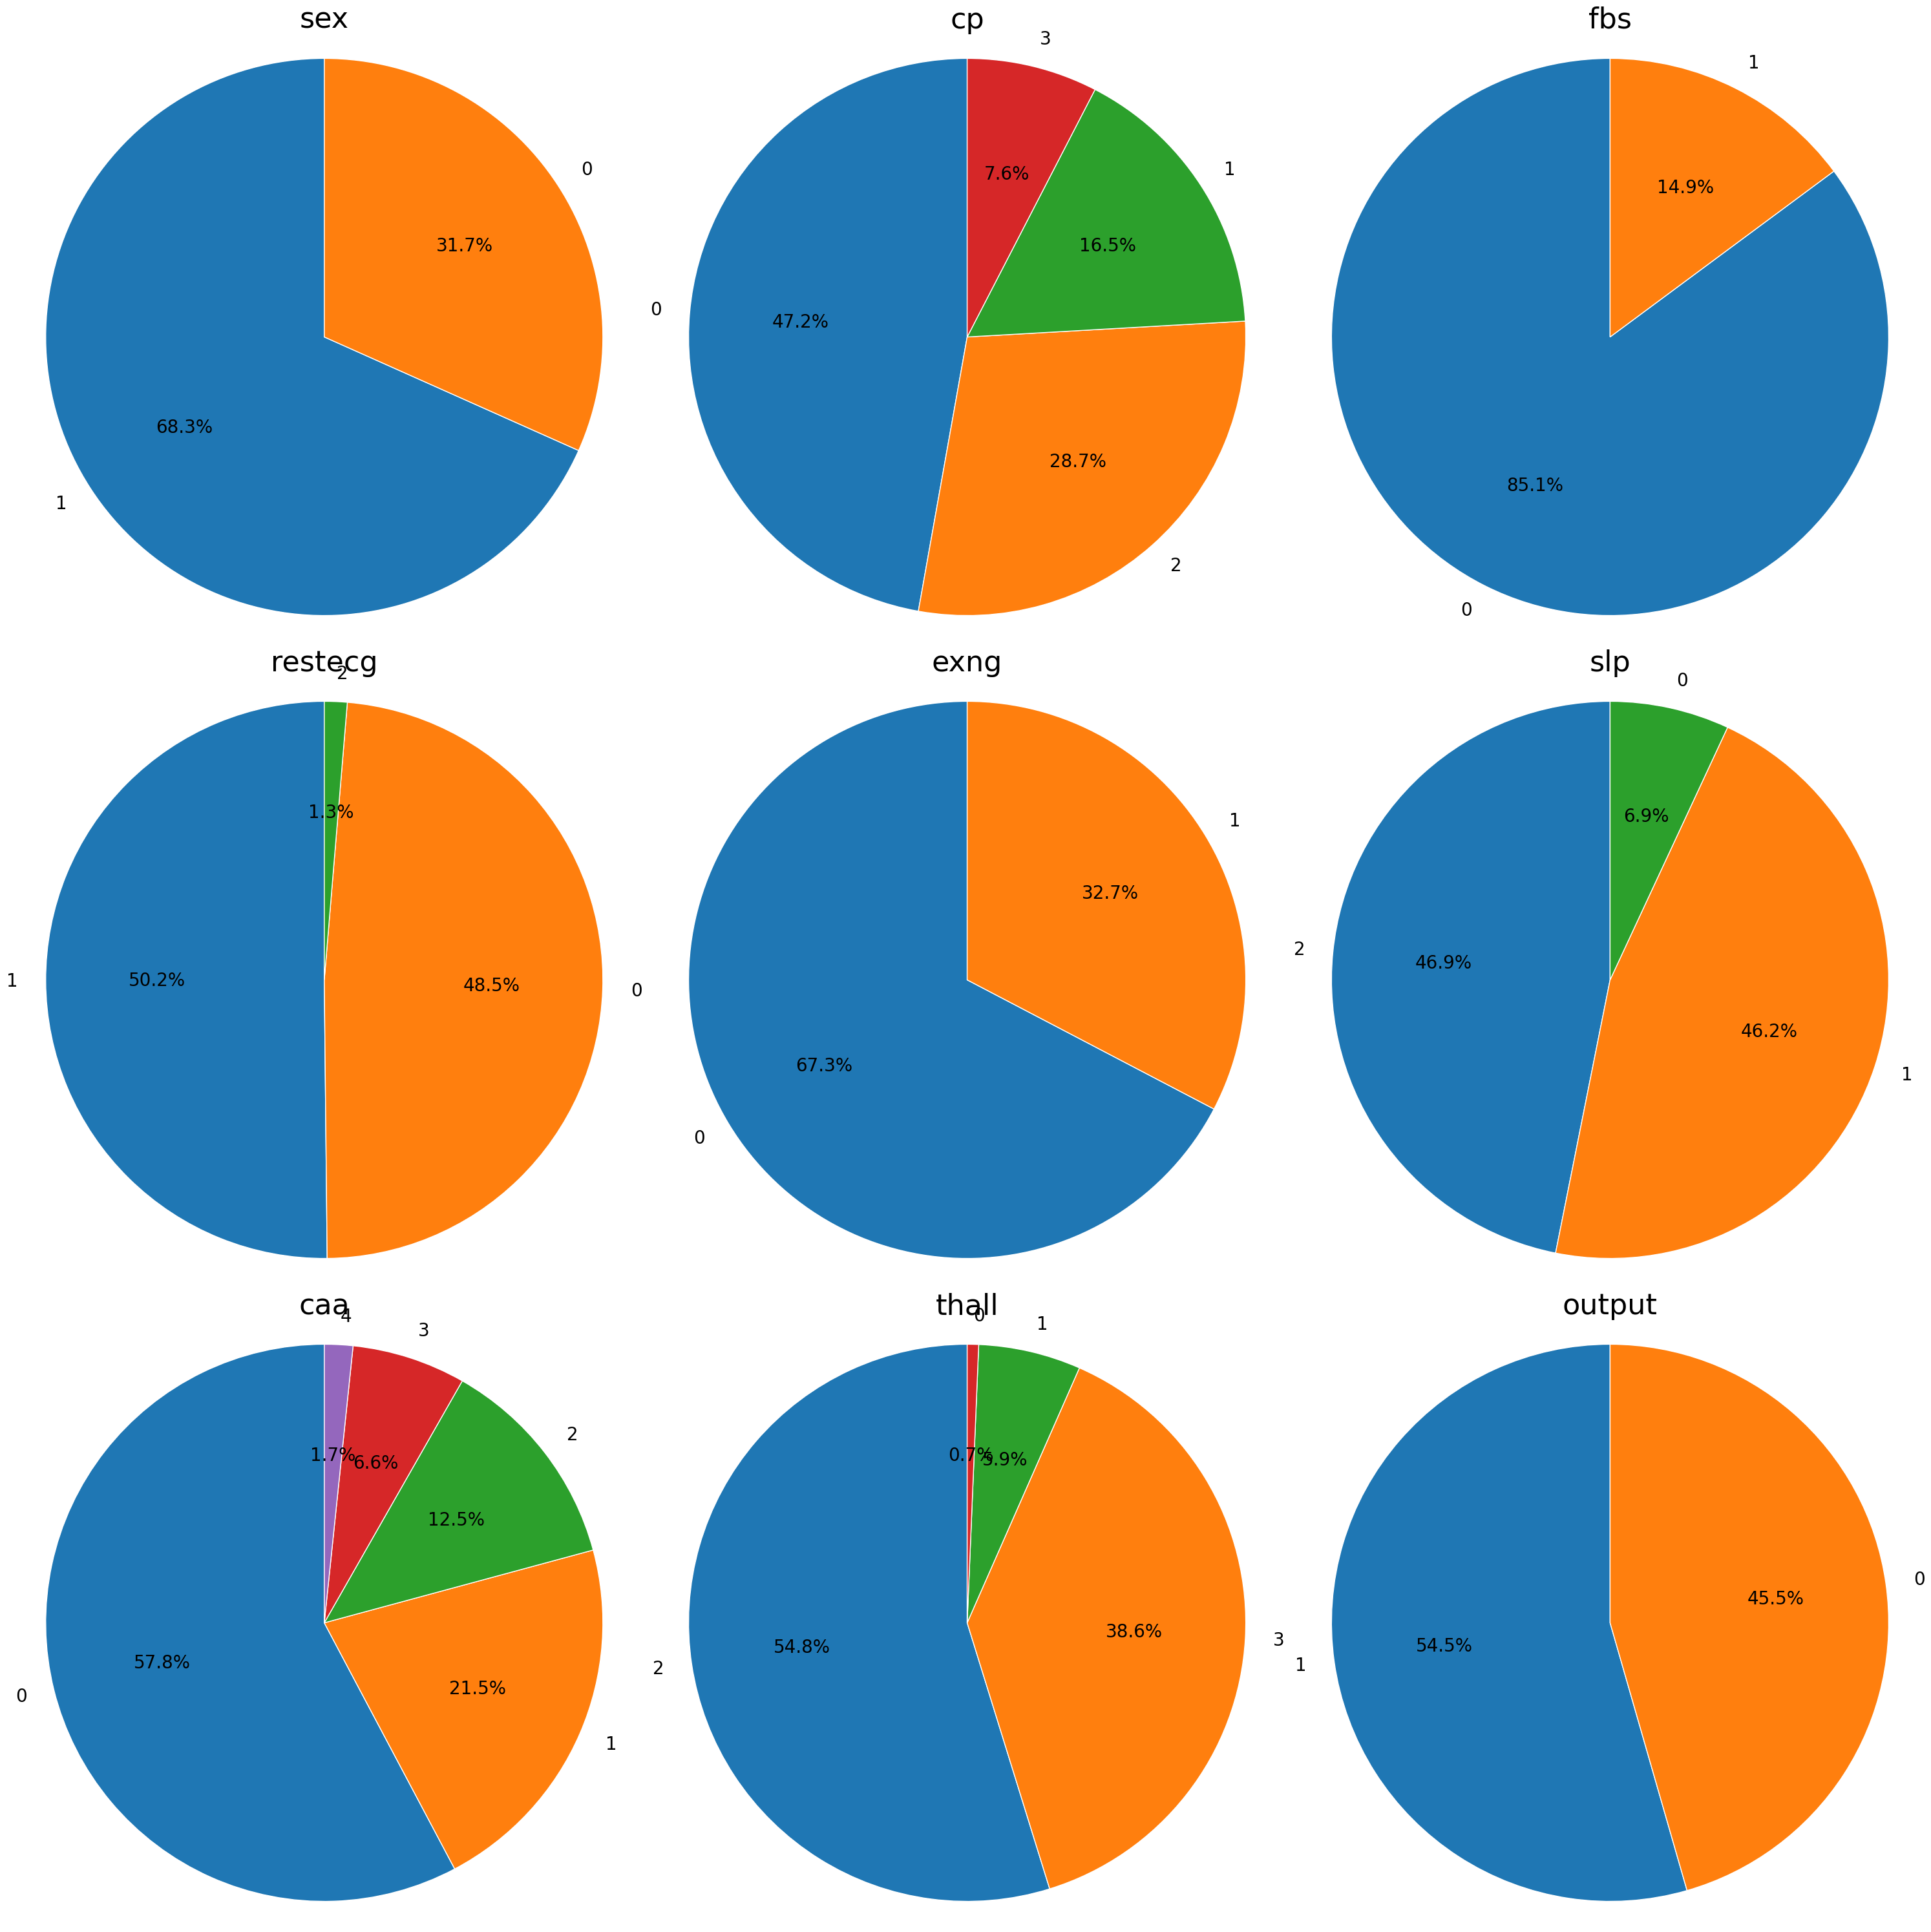

In [8]:
# categorized variable except age,trbgps,chol,thalachh,oldpeak
import matplotlib.pylab as plt # type: ignore

heart_cate = heart.drop(columns=["age","trtbps","chol","thalachh","oldpeak"])
fig, axes = plt.subplots(3, 3, figsize=(30, 30))

for ax, column in zip(axes.flatten(), heart_cate.columns):
    # 计算分布
    distribution = heart_cate[column].value_counts()
    
    wedges, texts, autotexts = ax.pie(
        distribution, 
        labels=distribution.index, 
        autopct='%1.1f%%', 
        startangle=90,
        textprops=dict(size=20)  # 设置标签字体大小
    )
    # 调整饼图的形状大小
    for wedge in wedges:
        wedge.set_edgecolor('white')  # 添加边框
        wedge.set_linewidth(1)  # 设置边框线宽

    ax.axis('equal')  # 确保饼图是圆形
    ax.set_title(column, fontsize=32)  # 设置标题字体大小

# 显示图形
plt.tight_layout()
plt.show()
    

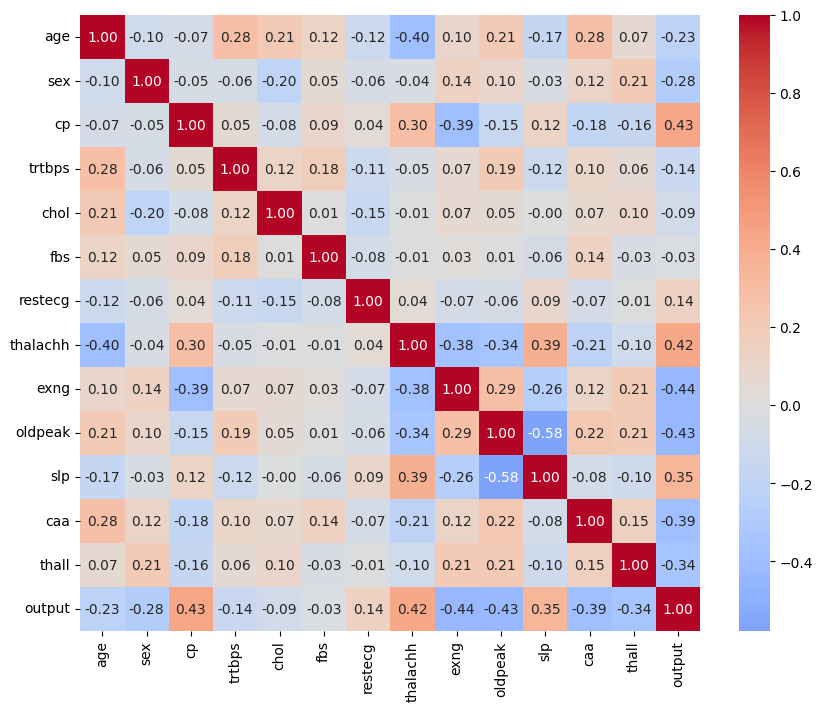

In [9]:

# relationship between two variables
# correlation matrix
num_columns = heart.select_dtypes(include=np.number).columns
correlation_matrix = heart[num_columns].corr(method='pearson')


# 使用 seaborn 绘制热图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.show()

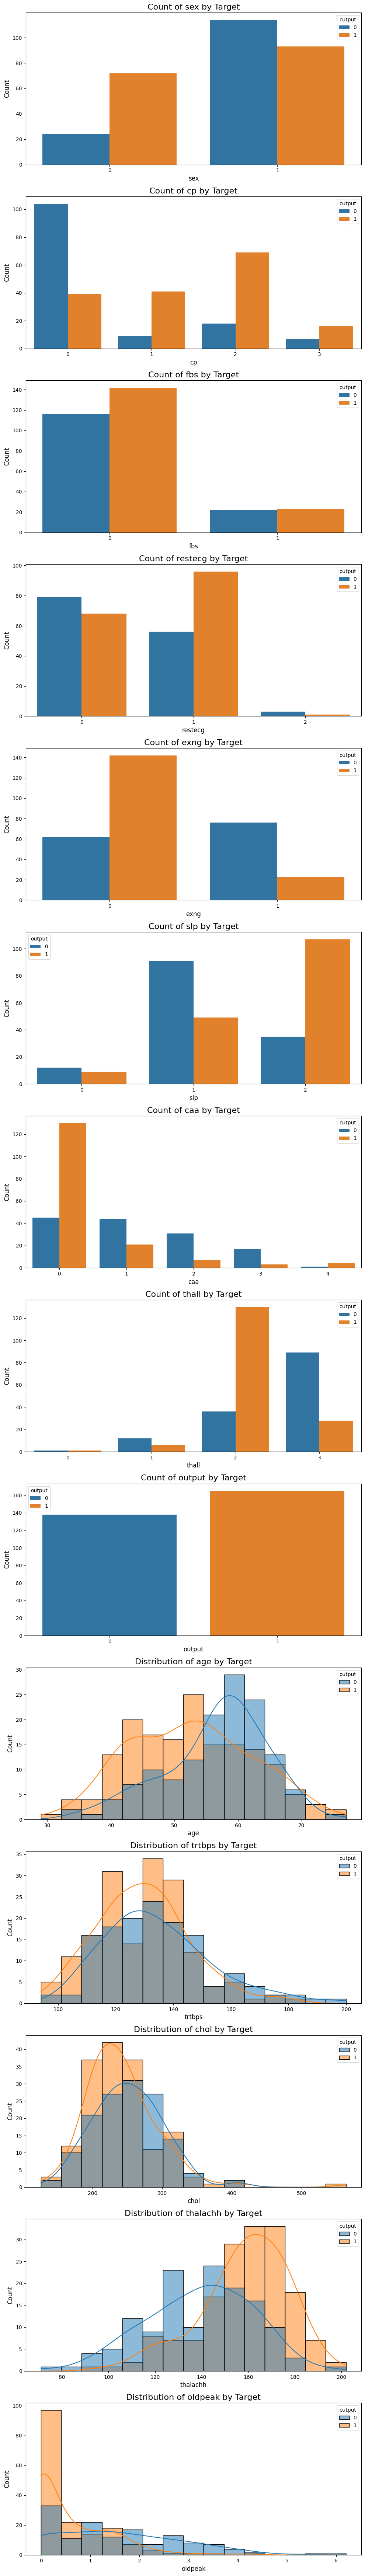

In [10]:
# 保留分类和连续变量
categorical_vars = heart_cate.columns
continuous_vars = heart_con.columns

# 创建图形
fig, axes = plt.subplots(nrows=len(categorical_vars) + len(continuous_vars), ncols=1, figsize=(10, 5 * (len(categorical_vars) + len(continuous_vars))))

# 绘制分类变量和目标变量之间的柱状图
for ax, column in zip(axes[:len(categorical_vars)], categorical_vars):
    sns.countplot(data=heart, x=column, hue='output', ax=ax)
    ax.set_title(f'Count of {column} by Target', fontsize=16)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)

# 绘制连续变量和目标变量之间的柱状图
for ax, column in zip(axes[len(categorical_vars):], continuous_vars):
    sns.histplot(data=heart, x=column, hue='output', bins=15, ax=ax, kde=True)
    ax.set_title(f'Distribution of {column} by Target', fontsize=16)
    ax.set_xlabel(column, fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
# 调整布局
plt.tight_layout()
plt.show()
    